In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import os

In [2]:
DATA_FILE = os.path.join('../data', 'train.csv')

In [3]:
data = pd.read_csv(DATA_FILE, parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [4]:
data.iloc[0:5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
data.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration'],
      dtype='object')

In [6]:
data['pickup_hr'] = data['pickup_datetime'].dt.hour
data['pickup_min'] = data['pickup_datetime'].dt.minute
data['pickup_sec'] = data['pickup_datetime'].dt.second
data['pickup_day'] = data['pickup_datetime'].dt.dayofweek
data['pickup_date'] = data['pickup_datetime'].dt.day
data['pickup_mon'] = data['pickup_datetime'].dt.month
data['pickup_yr'] = data['pickup_datetime'].dt.year
data['quarter'] = data['pickup_datetime'].dt.quarter
data['weekday'] = (data['pickup_day'] < 5).astype(int)

In [7]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=datetime(2015, 12, 31),
                        end=datetime(2017, 1, 1))

In [8]:
holidays

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26'],
              dtype='datetime64[ns]', freq=None)

In [9]:
data['holiday'] = (data['pickup_datetime'].dt.date.astype('datetime64[ns]').isin(holidays)).astype(int)

In [10]:
from haversine import haversine

In [11]:
def distance(positions):
    p1 = (positions[0], positions[1])
    p2 = (positions[2], positions[1])
    p3 = (positions[2], positions[3])
    dist = (haversine(p1, p2) + haversine(p2, p3))/1000
    return dist

In [12]:
y = data[[u'pickup_latitude', u'pickup_longitude', 
          u'dropoff_latitude', u'dropoff_longitude']]

data['h_dist'] = map(lambda pos: distance(pos), y.as_matrix())

In [13]:
data = data.assign(st_dist=lambda df: np.sqrt((df.pickup_longitude-df.dropoff_longitude)**2 + 
                                       (df.pickup_latitude-df.dropoff_latitude)**2))

In [14]:
data.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration', u'pickup_hr', u'pickup_min', u'pickup_sec',
       u'pickup_day', u'pickup_date', u'pickup_mon', u'pickup_yr', u'quarter',
       u'weekday', u'holiday', u'h_dist', u'st_dist'],
      dtype='object')

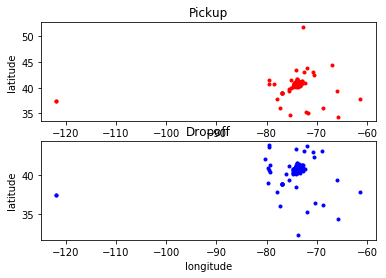

In [15]:
plt.subplot(2, 1, 1)
plt.plot(data['pickup_longitude'], data['pickup_latitude'], 'r.')
plt.ylabel('latitude')
plt.title('Pickup')
plt.subplot(2, 1, 2)
plt.plot(data['dropoff_longitude'], data['dropoff_latitude'], 'b.')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Dropoff')
plt.show()

In [16]:
data['s_pickup_latitude'] = (data['pickup_latitude'] - data['pickup_latitude'].min())/(data['pickup_latitude'].max() - data['pickup_latitude'].min())
data['s_pickup_longitude'] = (data['pickup_longitude'] - data['pickup_longitude'].min())/(data['pickup_longitude'].max() - data['pickup_longitude'].min())

data['s_dropoff_latitude'] = (data['dropoff_latitude'] - data['dropoff_latitude'].min())/(data['dropoff_latitude'].max() - data['dropoff_latitude'].min())
data['s_dropoff_longitude'] = (data['dropoff_longitude'] - data['dropoff_longitude'].min())/(data['dropoff_longitude'].max() - data['dropoff_longitude'].min())

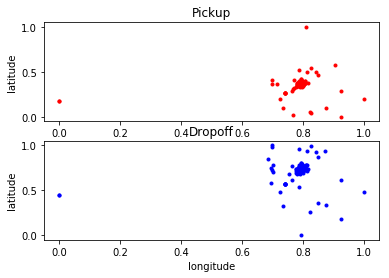

In [17]:
plt.subplot(2, 1, 1)
plt.plot(data['s_pickup_longitude'], data['s_pickup_latitude'], 'r.')
plt.ylabel('latitude')
plt.title('Pickup')
plt.subplot(2, 1, 2)
plt.plot(data['s_dropoff_longitude'], data['s_dropoff_latitude'], 'b.')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Dropoff')
plt.show()

In [18]:
data['flag'] = (data['store_and_fwd_flag'] == 'Y').astype(int)

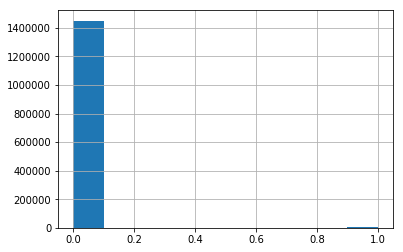

In [19]:
data['flag'].hist()

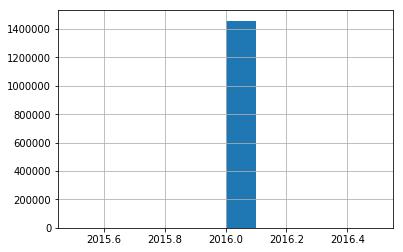

In [20]:
data['pickup_yr'].hist()

In [21]:
data['month_end'] = (data['pickup_datetime'].dt.is_month_end).astype(int)
data['month_start'] = (data['pickup_datetime'].dt.is_month_start).astype(int)

In [22]:
data.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration', u'pickup_hr', u'pickup_min', u'pickup_sec',
       u'pickup_day', u'pickup_date', u'pickup_mon', u'pickup_yr', u'quarter',
       u'weekday', u'holiday', u'h_dist', u'st_dist', u's_pickup_latitude',
       u's_pickup_longitude', u's_dropoff_latitude', u's_dropoff_longitude',
       u'flag', u'month_end', u'month_start'],
      dtype='object')

In [23]:
def travel_dir(positions):
    y = positions[1] - positions[3]
    x = positions[0] - positions[2]
    deg = np.degrees(np.arctan2(y, x))
    direction = np.round(deg/45).astype(int)
    if direction < 0:
        direction += 8
    return direction

print travel_dir([40.767937, -73.982155, 40.765602, -73.964630])

6


In [24]:
data['travel_dir'] = map(lambda x: travel_dir(x), y.as_matrix())

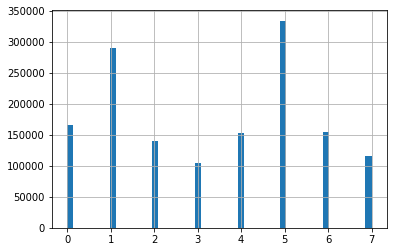

In [26]:
data['travel_dir'].hist(bins=50)

In [37]:
data[['travel_dir', 'trip_duration']].groupby('travel_dir').agg([np.mean, np.count_nonzero])

trip_duration              
                    mean count_nonzero
travel_dir                            
0             961.526022        165976
1             885.131704        290727
2            1150.221966        139670
3            1152.546150        104268
4             875.089816        152701
5             871.248346        334397
6             990.018453        154226
7            1064.064879        116679

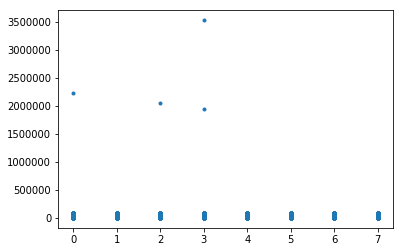

In [27]:
plt.plot(data['travel_dir'], data['trip_duration'], '.')
plt.show()

In [28]:
features = data[['id', 'vendor_id', 'passenger_count',
       'trip_duration', 'pickup_hr', 'pickup_min', 'pickup_sec',
       'pickup_day', 'pickup_date', 'pickup_mon', 'st_dist',
       's_pickup_latitude', 's_pickup_longitude', 's_dropoff_latitude',
       's_dropoff_longitude', 'flag', 'cityblock']]